In [1]:
%matplotlib inline

import os, pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

sns.color_palette('winter')
sns.set()

In [4]:
%%time
# Load Data
data_dir = '../data'

with open(os.path.join(data_dir, 'prep_train.pkl'), 'rb') as f:
    train = pickle.load(f)

Wall time: 1min 23s


In [5]:
train.head()

,id,d,values,store_id,item_id,date,wm_yr_wk,weekday,wday,month,year,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI,snap,sell_price
0,HOBBIES_1_008_CA_1_validation,d_1,12,CA_1,HOBBIES_1_008,2011-01-29,11101,Saturday,1,1,2011,NaN,NaN,NaN,NaN,0,0,0,0,0.459961
1,HOBBIES_1_008_CA_1_validation,d_2,15,CA_1,HOBBIES_1_008,2011-01-30,11101,Sunday,2,1,2011,NaN,NaN,NaN,NaN,0,0,0,0,0.459961
2,HOBBIES_1_008_CA_1_validation,d_3,0,CA_1,HOBBIES_1_008,2011-01-31,11101,Monday,3,1,2011,NaN,NaN,NaN,NaN,0,0,0,0,0.459961
3,HOBBIES_1_008_CA_1_validation,d_4,0,CA_1,HOBBIES_1_008,2011-02-01,11101,Tuesday,4,2,2011,NaN,NaN,NaN,NaN,1,1,0,1,0.459961
4,HOBBIES_1_008_CA_1_validation,d_5,0,CA_1,HOBBIES_1_008,2011-02-02,11101,Wednesday,5,2,2011,NaN,NaN,NaN,NaN,1,0,1,1,0.459961


In [6]:
train.shape

(46027957, 20)

## Store_id

In [33]:
train['store_id'].unique()

array(['CA_1', 'CA_2', 'CA_3', 'CA_4', 'TX_1', 'TX_2', 'TX_3', 'WI_1',
       'WI_2', 'WI_3'], dtype=object)

In [32]:
train['store_id'].value_counts()

TX_2    4722509
TX_1    4712583
CA_1    4702895
WI_3    4686669
CA_3    4671941
TX_3    4651795
CA_4    4567186
WI_2    4561208
WI_1    4475395
CA_2    4275776
Name: store_id, dtype: int64

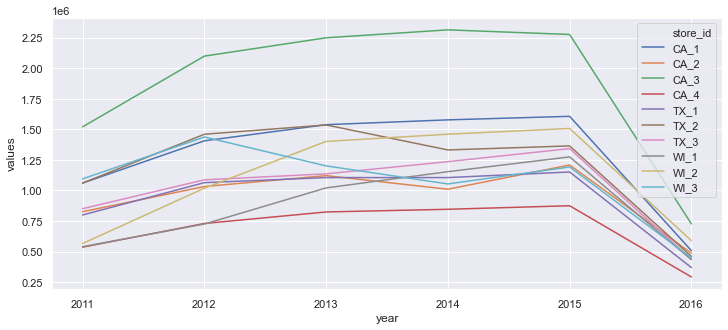

In [28]:
# 年ごとの推移
group = train.groupby(['year', 'store_id'])['values'].sum().reset_index()
fig = plt.figure(figsize=(12, 5))
sns.lineplot(x='year', y='values', hue='store_id', data=group)
plt.show()

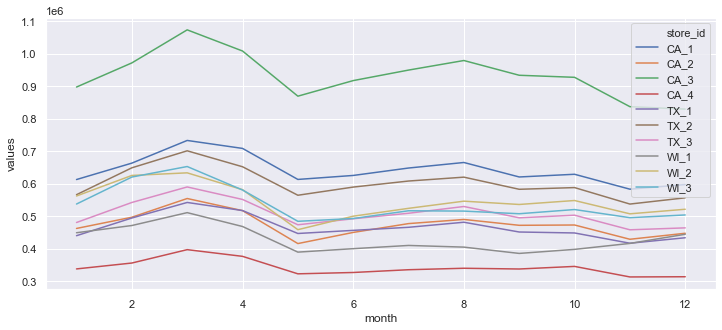

In [34]:
# 月ごとの推移
group = train.groupby(['month', 'store_id'])['values'].sum().reset_index()
fig = plt.figure(figsize=(12, 5))
sns.lineplot(x='month', y='values', hue='store_id', data=group)
plt.show()

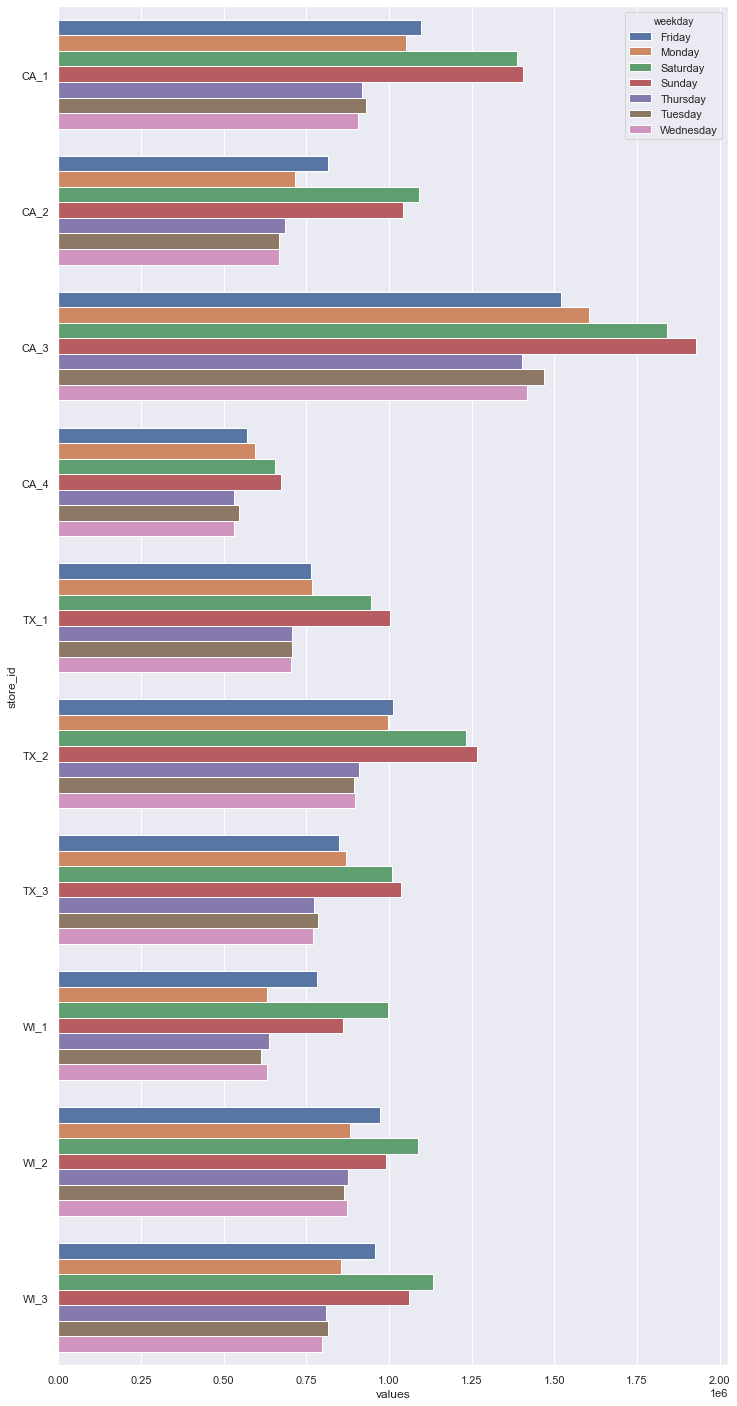

In [30]:
# 曜日ごとの推移
group = train.groupby(['weekday', 'store_id'])['values'].sum().reset_index()
fig = plt.figure(figsize=(12, 25))
sns.barplot(y='store_id', x='values', hue='weekday', data=group)
plt.show()

In [22]:
def plot_id(train, _id, from_date, to_date, date_interval=14):
    '''
    IDごとに売上数の波形を表示
    train: RawData
    _id: Target ID
    from_date: Start Date for Drawing Graph
    to_date: End Date for Drawing Graph
    date_interval: Interval of Xticks
    '''
    temp = train[train['id'] == _id].reset_index(drop=True)

    _temp = temp[temp['date'] < to_date]
    fig = plt.figure(figsize=(12, 5))
    plt.plot(_temp['date'], _temp['values'])
    plt.xticks(np.arange(0, len(_temp) + 1, date_interval), rotation=30)
    plt.show()

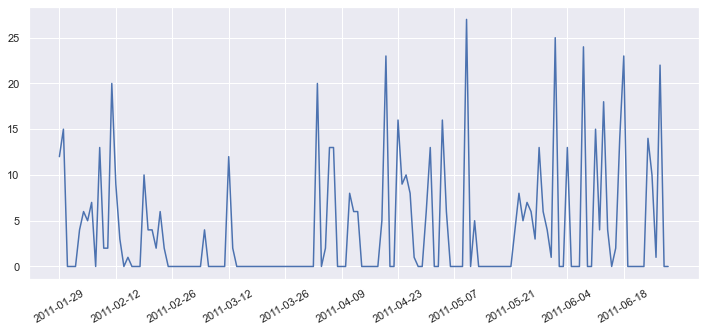

In [24]:
ids = train['id'].unique()
from_date = '2011-01-30'
to_date = '2011-06-30'

_id = ids[0]

plot_id(train, _id, from_date, to_date, date_interval=14)

In [16]:
temp.tail()

,id,d,values,store_id,item_id,date,wm_yr_wk,weekday,wday,month,year,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI,snap,sell_price
1908,HOBBIES_1_008_CA_1_validation,d_1909,4,CA_1,HOBBIES_1_008,2016-04-20,11612,Wednesday,5,4,2016,NaN,NaN,NaN,NaN,0,0,0,0,0.47998
1909,HOBBIES_1_008_CA_1_validation,d_1910,6,CA_1,HOBBIES_1_008,2016-04-21,11612,Thursday,6,4,2016,NaN,NaN,NaN,NaN,0,0,0,0,0.47998
1910,HOBBIES_1_008_CA_1_validation,d_1911,3,CA_1,HOBBIES_1_008,2016-04-22,11612,Friday,7,4,2016,NaN,NaN,NaN,NaN,0,0,0,0,0.47998
1911,HOBBIES_1_008_CA_1_validation,d_1912,2,CA_1,HOBBIES_1_008,2016-04-23,11613,Saturday,1,4,2016,NaN,NaN,NaN,NaN,0,0,0,0,0.47998
1912,HOBBIES_1_008_CA_1_validation,d_1913,1,CA_1,HOBBIES_1_008,2016-04-24,11613,Sunday,2,4,2016,NaN,NaN,NaN,NaN,0,0,0,0,0.47998
